In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
x1 = np.load('../Data/tas_train.npy')
x2 = np.load('../Data/psl_train.npy')
y = np.load('../Data/nao_index_train.npy')

file = '../Data/tas_train.nc'
data_in = nc.Dataset(file, 'r')
x1_nc = data_in.variables['var1'].__array__().data
lat = nc.Dataset(file, 'r').variables['lat'].__array__().data
lon = nc.Dataset(file, 'r').variables['lon'].__array__().data
N,D1,D2 = x1_nc.shape
x1_nc_resh = np.reshape(x1_nc,[N,D1*D2])

In [3]:
# check reshaping
x1_nc_2 = np.reshape(x1_nc_resh,[N,D1,D2])
np.mean(x1_nc_resh-x1), np.mean(x1_nc-x1_nc_2)

(-2.3248515601702873e-13, 0.0)

In [4]:
# prepare PCA
n_comp_pca = 4
pca = PCA(n_components=n_comp_pca)

In [5]:
# evaluate PCA for temperature
pca.fit(np.transpose(x1))
print(pca.explained_variance_ratio_.sum())
eofs_x1 = pca.transform(np.transpose(x1))
eofs_x1_resh = np.reshape(eofs_x1,[D1,D2,n_comp_pca])

0.35714037058481934


In [6]:
# evaluate PCA for pressure
pca.fit(np.transpose(x2))
print(pca.explained_variance_ratio_.sum())
eofs_x2 = pca.transform(np.transpose(x2))
eofs_x2_resh = np.reshape(eofs_x2,[D1,D2,n_comp_pca])

0.6188401273036098


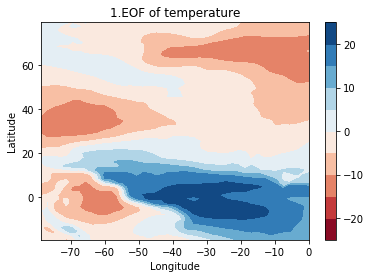

In [7]:
# plot 1st EOF pattern of temperature
fig,ax=plt.subplots()
plt.title("1.EOF of temperature")
cs = ax.contourf(lon,lat,eofs_x1_resh[:,:,0],vmin=-25,vmax=25, cmap='RdBu',levels=np.arange(-25,30,step=5))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.colorbar(cs)
plt.savefig('../Plots/firstEOF_temperature.pdf')

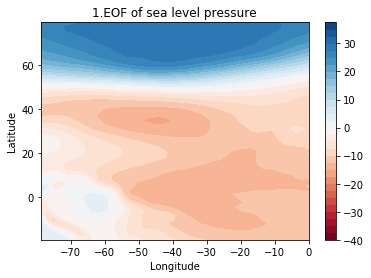

In [10]:
# plot 1st EOF pattern of pressure
fig,ax=plt.subplots()
plt.title("1.EOF of sea level pressure")
cs = ax.contourf(lon,lat,eofs_x2_resh[:,:,0],vmin=-40,vmax=40, cmap='RdBu',levels=np.arange(-40,40,step=2.5))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.colorbar(cs)
plt.savefig('../Plots/firstEOF_pressure.pdf')